In [1]:
import torch
from torchvision import datasets, transforms

train_dataset = datasets.MNIST(
    root="./mnist", train=True, transform=transforms.ToTensor(), download=True
)

test_dataset = datasets.MNIST(
    root="./mnist", train=False, transform=transforms.ToTensor()
)



100%|██████████| 9.91M/9.91M [00:00<00:00, 18.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 485kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.47MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.8MB/s]


In [2]:
len(train_dataset)

60000

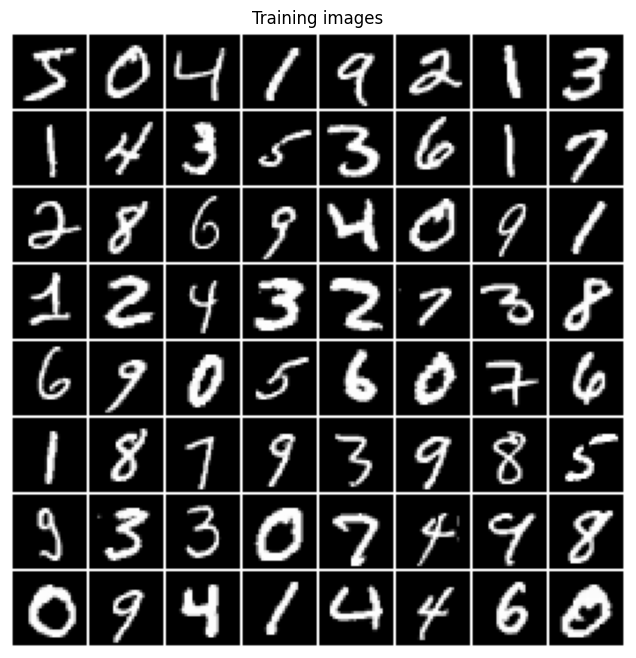

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Get multiple images
num_images = 64
images = []
labels = []

for i in range(num_images):
    img, label = train_dataset[i]
    images.append(img)
    labels.append(label)

# Stack images
images = torch.stack(images)

# Create grid
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training images")
plt.imshow(np.transpose(torchvision.utils.make_grid(
    images,
    padding=1,
    pad_value=1.0,
    normalize=True),
    (1, 2, 0)))
plt.show()

In [ ]:
image, label = train_dataset[0]


In [ ]:
x = torch.flatten(image)

In [ ]:
x.shape

torch.Size([784])

In [5]:
torch.manual_seed(1)
class MLP(torch.nn.Module):
  def __init__(self, num_features, num_classes, learning_rate = .7):
    super().__init__()
    self.layers = torch.nn.Sequential(

        #1st hidden layer
        torch.nn.Linear(num_features, 128),
        torch.nn.ReLU(),

        torch.nn.Linear(128, num_classes)
    )
    self.learning_rate = learning_rate
    self.optimizer = torch.optim.SGD(self.layers.parameters(), lr = learning_rate)
    self.loss_fn = torch.nn.CrossEntropyLoss()    # Changed for multi-class

  def forward(self, x):
    return self.layers(x)

  def predict(self,x):
    with torch.no_grad():
      logits = self.forward(x)
      return torch.argmax(logits, dim=1)

  def update(self, x, y_true):
    predictions = self.forward(x)

    loss = self.loss_fn(predictions, y_true)

    self.optimizer.zero_grad()
    loss.backward()
    self.optimizer.step()
    return loss.item()

## Prepare Data

In [6]:
X_train = []
y_train = []

for i in range(len(train_dataset)):
    image, label = train_dataset[i]
    X_train.append(image.flatten())
    y_train.append(label)

X_train = torch.stack(X_train)
y_train = torch.tensor(y_train)

In [7]:
mlp = MLP(num_features=784, num_classes=10, learning_rate=0.01)

In [8]:
epoch_no = 100
for epoch in range(epoch_no):
    loss = mlp.update(X_train, y_train)

    if epoch % 10 == 0:
        # Calculate accuracy
        predictions = mlp.predict(X_train)
        accuracy = (predictions == y_train).float().mean()
        print(f"Epoch: {epoch}/{epoch_no}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")


Epoch: 0/100, Loss: 2.2973, Accuracy: 0.1271
Epoch: 10/100, Loss: 2.2788, Accuracy: 0.1926
Epoch: 20/100, Loss: 2.2602, Accuracy: 0.2636
Epoch: 30/100, Loss: 2.2414, Accuracy: 0.3183
Epoch: 40/100, Loss: 2.2222, Accuracy: 0.3643
Epoch: 50/100, Loss: 2.2026, Accuracy: 0.4029
Epoch: 60/100, Loss: 2.1825, Accuracy: 0.4398
Epoch: 70/100, Loss: 2.1616, Accuracy: 0.4759
Epoch: 80/100, Loss: 2.1399, Accuracy: 0.5129
Epoch: 90/100, Loss: 2.1175, Accuracy: 0.5446


In [25]:
image, label = train_dataset[0]
print(image.shape)
print(label)

torch.Size([1, 28, 28])
5


In [27]:
mlp.predict(train_dataset[2][0].flatten().reshape(1,-1)).item() #unsqueeze(0)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

## Adam Optimizer

In [28]:
torch.manual_seed(1)
class MLP(torch.nn.Module):
  def __init__(self, num_features, num_classes, learning_rate = .7):
    super().__init__()
    self.layers = torch.nn.Sequential(

        #1st hidden layer
        torch.nn.Linear(num_features, 128),
        torch.nn.ReLU(),

        torch.nn.Linear(128, num_classes)
    )
    self.learning_rate = learning_rate
    self.optimizer = torch.optim.Adam(self.layers.parameters(), lr = learning_rate)
    self.loss_fn = torch.nn.CrossEntropyLoss()    # Changed for multi-class

  def forward(self, x):
    return self.layers(x)

  def predict(self,x):
    with torch.no_grad():
      logits = self.forward(x)
      return torch.argmax(logits, dim=1)

  def update(self, x, y_true):
    predictions = self.forward(x)

    loss = self.loss_fn(predictions, y_true)

    self.optimizer.zero_grad()
    loss.backward()
    self.optimizer.step()
    return loss.item()

In [29]:
mlp = MLP(num_features=784, num_classes=10, learning_rate=0.01)
epoch_no = 100
for epoch in range(epoch_no):
    loss = mlp.update(X_train, y_train)

    if epoch % 10 == 0:
        # Calculate accuracy
        predictions = mlp.predict(X_train)
        accuracy = (predictions == y_train).float().mean()
        print(f"Epoch: {epoch}/{epoch_no}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

Epoch: 0/100, Loss: 2.2973, Accuracy: 0.3849
Epoch: 10/100, Loss: 0.4061, Accuracy: 0.8855
Epoch: 20/100, Loss: 0.3218, Accuracy: 0.9147
Epoch: 30/100, Loss: 0.2601, Accuracy: 0.9275
Epoch: 40/100, Loss: 0.2163, Accuracy: 0.9393
Epoch: 50/100, Loss: 0.1817, Accuracy: 0.9493
Epoch: 60/100, Loss: 0.1544, Accuracy: 0.9570
Epoch: 70/100, Loss: 0.1325, Accuracy: 0.9623
Epoch: 80/100, Loss: 0.1144, Accuracy: 0.9676
Epoch: 90/100, Loss: 0.0996, Accuracy: 0.9711


In [32]:
mlp.predict(train_dataset[9][0].flatten().reshape(1,-1)).item()

4

## New Section

In [33]:
train_set = torchvision.datasets.CIFAR10(root='./data', transform=transforms.ToTensor(), download=True)
test_set = torchvision.datasets.CIFAR10(root='./data', transform=transforms.ToTensor(), download=True)


100%|██████████| 170M/170M [00:03<00:00, 45.1MB/s]


In [34]:
X_train = []
y_train = []

for i in range(len(train_set)):
    image, label = train_set[i]
    X_train.append(image.flatten())
    y_train.append(label)

X_train = torch.stack(X_train)
y_train = torch.tensor(y_train)

In [35]:
image, label = train_set[0]
image.shape

torch.Size([3, 32, 32])

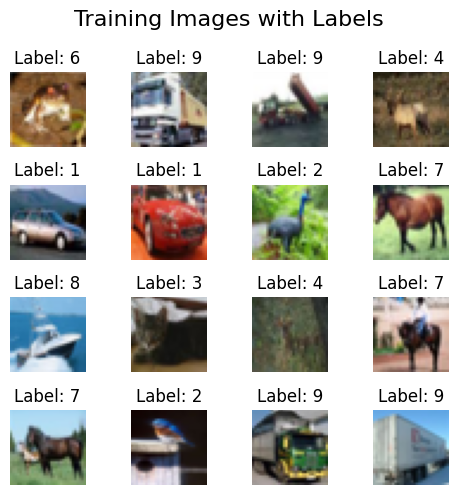

In [36]:
num_images = 16  # Use fewer for readability
fig, axes = plt.subplots(4, 4, figsize=(5, 5))
fig.suptitle('Training Images with Labels', fontsize=16)

for i in range(num_images):
    img, label = train_set[i]
    ax = axes[i // 4, i % 4]

    # Display image
    if img.shape[0] == 1:  # Grayscale
        ax.imshow(img.squeeze(), cmap='gray')
    else:  # RGB
        ax.imshow(np.transpose(img, (1, 2, 0)))

    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [37]:
mlp = MLP(num_features=3072, num_classes=10, learning_rate=0.01)
epoch_no = 100
for epoch in range(epoch_no):
    loss = mlp.update(X_train, y_train)

    if epoch % 10 == 0:
        # Calculate accuracy
        predictions = mlp.predict(X_train)
        accuracy = (predictions == y_train).float().mean()
        print(f"Epoch: {epoch}/{epoch_no}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

Epoch: 0/100, Loss: 2.3010, Accuracy: 0.1262
Epoch: 10/100, Loss: 2.6797, Accuracy: 0.1341
Epoch: 20/100, Loss: 2.2533, Accuracy: 0.1252
Epoch: 30/100, Loss: 2.2254, Accuracy: 0.1533
Epoch: 40/100, Loss: 2.1184, Accuracy: 0.2079
Epoch: 50/100, Loss: 2.0377, Accuracy: 0.2380
Epoch: 60/100, Loss: 1.9602, Accuracy: 0.2569
Epoch: 70/100, Loss: 1.8996, Accuracy: 0.2862
Epoch: 80/100, Loss: 1.8738, Accuracy: 0.3037
Epoch: 90/100, Loss: 1.8564, Accuracy: 0.3034


In [ ]:
mlp.predict(train_dataset[4][0].flatten().reshape(1,-1)).item()

RuntimeError: both arguments to linear need to be at least 1D, but they are 0D and 2D